# 第7回予習課題
## 1. pandasライブラリ
csvファイル"iris.csv"をpandasモジュールのデータフレームオブジェクトとしてロードし、'species'列の値が'setosa'である行を抽出した上で、それらの行から'sepal_length'列の最大値を返す以下のmax_sepal_length関数を完成させてください。最大値の計算にはデータフレームオブジェクトの`max()`メソッドを使ってもよいです。

Denfine the following 'max_sepal_length' function which firstly loads a csv file, "iris.csv", as a DataFrame of pandas, extracts rows whose value of 'species' column is 'setosa', and finally returns maximum value of 'sepal_length' column from those rows: You may use a `max ()` method of the DataFrame object to calculate the maximum value.

In [1]:
import pandas as pd

def max_sepal_length():
    iris_d = pd.read_csv('iris.csv')
    iris_setosa = iris_d[(iris_d["species"] == "setosa")]
    return max(iris_setosa["sepal_length"])

以下のセルを実行してテストしてください。

Execute the following cell and make sure that it returns 'True'

In [2]:
print(max_sepal_length()==5.8)

True


## 2. scikit-learnライブラリ
csvファイル"iris.csv"をpandasモジュールのデータフレームオブジェクトとしてロードし、2つの特徴量、sepal_lengthとsepal_width、から2つの花の種類、versicolorかvirginica、を予測するモデルをロジスティック回帰を用いて学習し、その予測精度（accuracy_score）を返す以下のpredict_iris関数を完成させてください。predict_irisは関数はtrain_test_splitでデータを分割する際のtest_sizeとrandom_stateの値をそれぞれtsizeとrstate引数で受け取ります。また、train_test_splitではstratifyにラベルデータを指定してください。

Define the following 'predict_iris' function. It loads a csv file, "iris.csv", as a DataFrame of pandas, and learns the model which predicts two types of flower (versicolor or virginica) based on two features (sepal_length and sepal_width) using logistic regression. The function should return its prediction accuracy (accuracy_score) given the values of test_size and random_state for train_test_split as tsize and rstate arguments, respectively. Please note to specify label data for stratify in train_test_split.

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def predict_iris(tsize, rstate):
    iris = pd.read_csv('iris.csv')
    iris2 = iris[(iris['species'] == 'versicolor')|(iris['species'] == 'virginica')] # | = "or"　ブール演算
    
    X_iris = iris2[['sepal_length','sepal_width']].values
    y_iris = iris2['species'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size = tsize, random_state = rstate, stratify = y_iris)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    
    ###　決定境界を可視化　###
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
 
    w2 = model.coef_[0,1]
    w1 = model.coef_[0,0]
    w0 = model.intercept_[0]

    line=np.linspace(4,8)
    plt.plot(line, -(w1*line+w0)/w2)
    y_c = (y_iris=='versicolor').astype(np.int)
    plt.scatter(iris2['sepal_length'],iris2['sepal_width'],c=y_c);
    ### ###
    
    return accuracy_score(y_test, y_predicted)

以下のセルを実行してテストしてください。

Execute the following cell and make sure that it returns 'True'

C:\Users\Masahiro Yamamoto\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


True


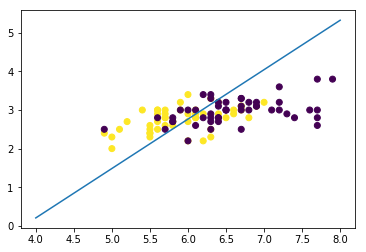

In [6]:
print(predict_iris(0.3,10)==0.7)